# Linear Regression II

Learning objectives:

Learn basic measures of quality of fit and variance explained:
- Mean Squared Errors
- R2
- Total Sum of Squares
- Residual Sum of Squares
- Explained Sum of Squares
- Linear Regression with multiple parameters


---

## Linear regression *recap*. 

In the last tutorial we went over linear regression using *numpy*'s *polyval* and *polyfit*.

Linear regression is used to model the relationship between a dependent variable and one or more independent variables. It assumes that there is a linear relationship between the independent variable(s) and the dependent variable. 

The goal of linear regression is to find the best-fit model that minimizes the difference between the predicted values and the actual values. Linear regression is important because it can help us to understand and predict the relationship between two or more variables. The term **linear** in Linear regression does not refer only to a line, but it applies to any polynomial! Linear here is referred to the parameters of the model and not the model *per se*!


In the previous tutorial we have learned how to fit models via linear regression by using `numpy`. Here we will learn a little bit more about fitting linear regression models. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(123)
x = np.random.rand(50)
y = 2*x + 0.5*np.random.randn(50)

# Fit a linear regression model
coeffs = np.polyfit(x, y, 1)
y_pred = np.polyval(coeffs, x)

# Print the coefficients
print("Intercept:", coeffs[0])
print("Coefficient:", coeffs[1])

# Compute SSE
sse = sum((y_pred-y)**2)
print("SSE:", sse)

Intercept: 1.8342321813863354
Coefficient: 0.1358317884989732
SSE: 15.356374565056806


---

### <span style="color:blue">Exercise</span> 

- Generate your own data of shape `(10,)`.
- Fit a line and estimate the SSE
- Make a single figure and plot, data, and line in different colors

SSE: 2.817885466331311


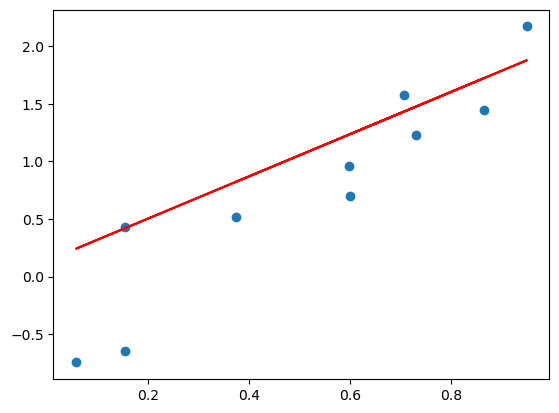

In [2]:
np.random.seed(42)

x1 = np.random.rand(10)
y1 = 2*x1 + 0.5*np.random.randn(10)

# Fit a linear regression model
new_coeffs = np.polyfit(x1, y1, 1)
y_hat = np.polyval(coeffs, x1)

# Compute SSE
sse = sum((y_hat-y1)**2)
print("SSE:", sse)

# plot
plt.scatter(x1, y1)
plt.plot(x1, y_hat, color = 'red')
plt.show();

---

## Linear regression using scikit-learn

The same operations of fitting and evaluating the fit of a regression model can also be implemented using a much more powerful set of toosl implemented in the machine learning library `scikit-learn`. `scikit-learn` has module dedicated to linear regression models called `LinearRegression`. 

Let's import it:

In [3]:
from sklearn.linear_model import LinearRegression

We can implement the operations shown about using `polyval` and `polyfit` using `LinearRegression` using the following lines:

In [4]:
# Fit a linear model
model = LinearRegression()

# The fit method in LinearRegression only acceps predictors (x) as matrices. 
# So we need to reshape our array:
X = np.array(x).reshape(-1, 1)
model.fit(X, y)
y_pred = model.predict(X)

# The coefficients can be extracted from the fit model as follows:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

# Compute SSE
sse = sum((y-y_pred)**2)
print("SSE:", sse)

Intercept: 0.13583178849897348
Coefficient: 1.8342321813863358
SSE: 15.356374565056807


OK, besides the ideosyncracy of how `LinearRegression` accepts `x`, that was not very different. Instead of  using `polyfit` and `polyval`, we used `model.fit` and `model.predict` and the results (parameers and MSE) were identical. Good.

Now, `LinearRegression` might seem a little bit more complicated because, oh well, it is more complicated but also much more powerful! 

---

### <span style="color:blue">Exercise</span> 

- Generate a new data set of shape `(12,)`.
- Fit a line using `scikit-learn.linear_model` and estimate the SSE
- Make a single figure and plot, data, and line in different colors

SSE: 1.4555522699526797


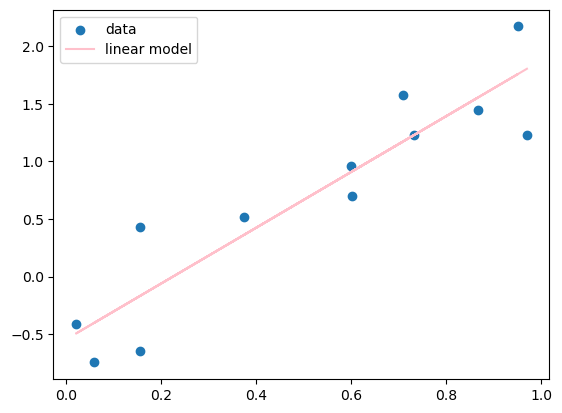

In [32]:
np.random.seed(42)
x2 = np.random.rand(12)
new_x = x2.reshape(-1, 1)
new_y = 2*x2 + 0.5*np.random.randn(12)

model.fit(new_x, new_y)
y_pred1 = model.predict(new_x)

# Compute SSE
sse = sum((new_y - y_pred1) ** 2)
print("SSE:", sse)

# plot
plt.scatter(new_x, new_y, label = 'data')
plt.plot(new_x, y_pred1, color = 'pink', label = 'linear model')
plt.legend();

---

## Quality of fit metrics

Linear regession is more generally referred to as *Ordinary Linear Square Regression* or *OLS* Regression. 

This is because the approach in regression is to minimise the sum of square errors (SSEs) between the data and the prediction of a model. The parameters of the model are adjusted so as to reduce the SSE and eventually minimize it.

We have seen before how to compute the SSE.

In [6]:
print(sum((y-y_pred)**2))

15.356374565056807


In addition to SSE there are other measures of error important to learn about. 



When fitting OLS regression models we attempt to explain some proportion of the variability in the data with a model. More specifically, we try to explain some proportion fo the *variance* in the data using the model. So models are generally judged by the proportion of variance in the data that they can explain. 

The proportion of variance explained is a measure that describes the amount of variation in the dependent variable ($y$) that can be explained by the independent variable(s) ($x$) in a statistical model, such as a linear regression model.

When we fit a regression model, we are trying to find a line (or curve) that best represents the relationship between the independent variable(s) and the dependent variable. The amount of variation in the dependent variable that can be explained by the independent variable(s) is determined by the fit of the regression line to the data points.

In the context of linear regression, the total sum of squares ($TSS$) can be decomposed into two components: 
* the explained sum of squares ($ESS$) and 
* the residual sum of squares ($RSS$ or as called until now, the sum of squared error, $SSE$).

The explained sum of squares ($ESS$) is the sum of squares of the difference between the predicted values of the dependent variable and the mean of the dependent variable. It represents the amount of variability in the dependent variable that is explained by the independent variable(s) in the model.

$ESS = Σ(ŷi - ȳ)^2$

In [7]:
ESS = sum((y_pred - np.mean(y))**2)
print(ESS)

9.091390913253539


The residual sum of squares ($RSS$, a.k.a., $SSE$) is the sum of squares of the difference between the predicted values of the dependent variable and the actual values of the dependent variable. It represents the amount of variability in the dependent variable that is not explained by the independent variable(s) in the model.

$RSS = Σ(yi - ŷi)^2$

In [8]:
RSS = sum((y - y_pred)**2) #a.k.a. SSE
print(RSS)

15.356374565056807


The total sum of squares ($TSS$) is the sum of squares of the difference between the actual values of the dependent variable and the mean of the dependent variable. It represents the total amount of variability in the dependent variable.

$TSS = Σ(yi - ȳ)^2$

In [9]:
TSS = sum((y - np.mean(y))**2)
print(TSS)

24.447765478310348


where $y_i$ is the actual value of the dependent variable, $ŷ_i$ is the predicted value of the dependent variable, and $ȳ$ is the mean of the dependent variable.

Note that $TSS = Σ(RSS + ESS)$

In [10]:
print([TSS, RSS+ESS])

[24.447765478310348, 24.447765478310345]


So far we have used only the SSE to copute the quality of fit of a model. There are several alternatives to RSS (a.k.a., SSE) that can be used to estimate the quality of fit of a model. A few commonly used ones are:

* Mean squared error (MSE): MSE is calculated as SSE divided by the number of degrees of freedom in the model. It is a measure of the average squared difference between the predicted values of the dependent variable and the actual values, and is often used as a measure of the overall goodness of fit of a model.

* Root mean squared error (RMSE): RMSE is the square root of MSE and is often used as a more interpretable measure of the overall goodness of fit of a model. RMSE has the same units as the dependent variable and is more easily interpretable than MSE.

* Mean absolute error (MAE): MAE is a measure of the average absolute difference between the predicted values of the dependent variable and the actual values. It is less sensitive to outliers than SSE and can be more robust in the presence of extreme values.

* Coefficient of determination (R²): R² is a measure of the proportion of variance in the dependent variable that is explained by the independent variables in the model. It ranges from 0 to 1, with higher values indicating a better fit between the model and the observed data. $R² = 1 - (SSE / TSS)$

Each one of these metrics is useful in different situations. Others also exist such as the K-L Divergence or Akaiake Information Criteria (AIK) or Baeysian Information Cirteria (BIC), we will cover some of these only in the future.


`scikit-learn` provides a convenient way to compute several goodness of fit  metrics to evaluate model performance. The module `sklearn.metrics` can be imported and submodules within it contain estimators of the goodness of fit of models: 

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
 
mae  = mean_absolute_error(y_true=y,y_pred=y_pred)
mse  = mean_squared_error(y_true=y,y_pred=y_pred) #squared=True
rmse = mean_squared_error(y_true=y,y_pred=y_pred,squared=False)
r2   = r2_score(y_true=y,y_pred=y_pred)
 
print("Mean Absolute Error (MAE):",mae)
print("Mean Squared Error (MSE):",mse)
print("Root-Mean Squared Error (RMSE):",rmse)
print("Coefficient of Determination (R²):",r2)

Mean Absolute Error (MAE): 0.4859694020486803
Mean Squared Error (MSE): 0.3071274913011361
Root-Mean Squared Error (RMSE): 0.5541908437543299
Coefficient of Determination (R²): 0.37187001492301097


---

### <span style="color:blue">Exercise</span> 

- Generate a new data set of shape `(15,)`.
- Fit a line using `scikit-learn.linear_model` and estimate the SSE
- Use `scikit-learn.metrics` to estimate 

In [12]:
x3 = np.random.rand(15)
new_x3 = x3.reshape(-1, 1)
y3 = 2*x3 + 0.5*np.random.randn(15)

model.fit(new_x3, y3)
y_pred3 = model.predict(new_x3)

# compute SSE
sse = sum((y3 - y_pred3) ** 2)
print("SSE:", sse)

# other estimate metrics
mae1 = mean_absolute_error(y_true = y3, y_pred = y_pred3)
mse1 = mean_squared_error(y_true = y3, y_pred = y_pred3) #squared = True
rmse = mean_squared_error(y_true= y3,y_pred= y_pred3,squared=False)
r2 = r2_score(y_true = y3, y_pred = y_pred3)

print("Mean Absolute Error (MAE):",mae)
print("Mean Squared Error (MSE):",mse)
print("Root-Mean Squared Error (RMSE):",rmse)
print("Coefficient of Determination (R²):",r2)

SSE: 4.567789644047175
Mean Absolute Error (MAE): 0.4859694020486803
Mean Squared Error (MSE): 0.3071274913011361
Root-Mean Squared Error (RMSE): 0.5518326826159764
Coefficient of Determination (R²): 0.5719673046597806


### Linear regression using scikit-learn (generalized linear regression)


So, far we have used `scikit-learn`'s `LinearRegression` uniquely to predict `n` `y` variables from `n` `x` variables.

Yet, in practice we can think situations where we might have multiple variables (say `n x m` variables) and we would like to use them to predict a single set of `n` variables.

For example imagine the case of `m` repeated measures of `n` values and wanting to predict corresponding `n` values of another variable.

`LinearRegression` allows us to set up this type of modelling. This is the reason why the `X` variables must alswyas be 2D and above we had to make sure it was a 2D array.

To work this example, we will use one of the datasets that come with `scikit learn`, the Boston Housing database:

In [13]:
import pandas as pd
import seaborn as sns
#from sklearn.datasets import load_boston

from sklearn.datasets import fetch_openml

boston_dataset=fetch_openml(data_id=531)

/Users/phoebewang/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


To explore the dataset take a look at the Headers and Dictionary Keys. For example:

In [14]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


Where:

* `data`: contains the information for various houses
* `target`: prices of the house
* `feature_names`: names of the features
* `DESCR`: describes the dataset

The dataset contains a series of attributes or features (variables) measured along different dimensions. 

Take a look at:

In [15]:
print(boston_dataset.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

The last variable `MEDV` (or median value) is our interest. It is the median value of homes in thousands of dollars.

The dataset contains `.data` and `.target`

In [16]:
print(boston_dataset.data)

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [17]:
print(boston_dataset.target)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


For convenience we are going to create a smalled table of features:

In [18]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


We can take a look at the median house value:

/Users/phoebewang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


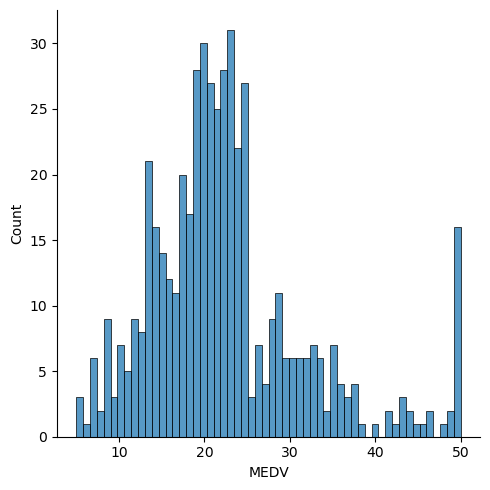

In [19]:
sns.displot(boston_dataset.target, bins=56);

We can explore the relationship between some of the features in the data and the target variable:

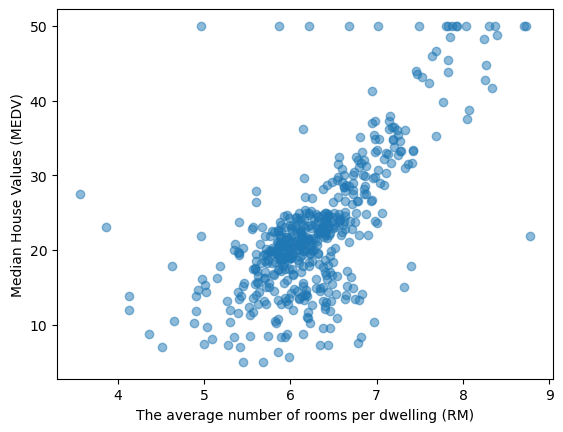

In [49]:
x = boston['RM']
y = boston_dataset.target
plt.scatter(x, y, marker='o', alpha = 0.5)
plt.xlabel('The average number of rooms per dwelling (RM)')
plt.ylabel('Median House Values (MEDV)');

OK, it looks like there are features (like "RM") that have a relationship with the Median House Values. Let's try another feature:

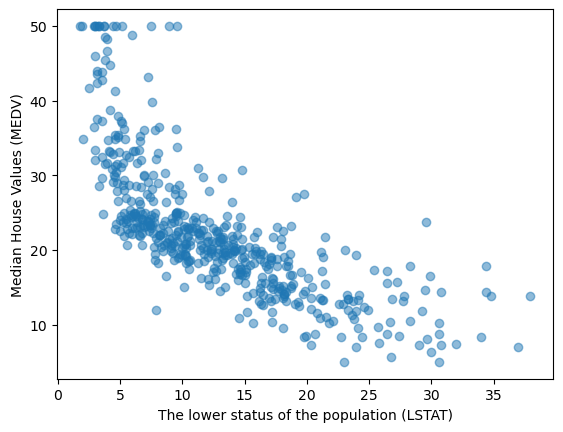

In [48]:
x = boston['LSTAT']
y = boston_dataset.target
plt.scatter(x, y, marker='o', alpha = 0.5)
plt.xlabel('The lower status of the population (LSTAT)')
plt.ylabel('Median House Values (MEDV)');

Also, a relationship. So, it looks like multiple features in the dataset have a relationship with the target variable (the median house value)

---

### <span style="color:blue">Exercise</span> 

- Explore the relationship between the target variable and two additional features of your choice. Make a plot.

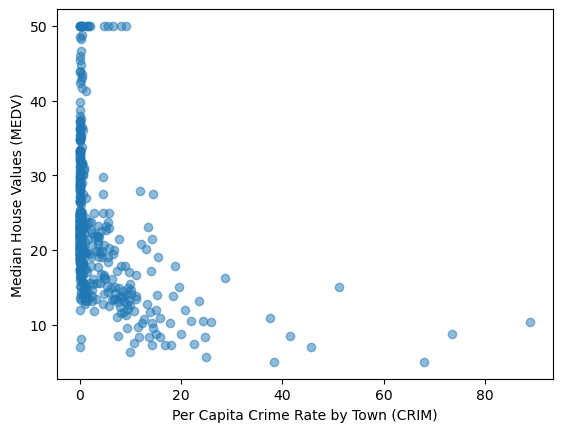

In [47]:
x = boston['CRIM']
y = boston_dataset.target
plt.scatter(x, y, marker='o', alpha = 0.5)
plt.xlabel('Per Capita Crime Rate by Town (CRIM)')
plt.ylabel('Median House Values (MEDV)');

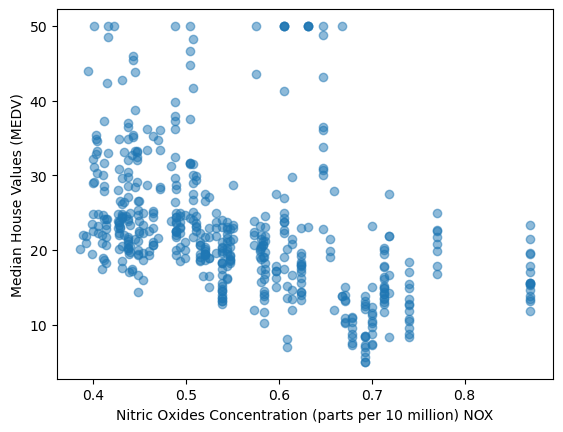

In [46]:
x = boston['NOX']
y = boston_dataset.target
plt.scatter(x, y, marker='o', alpha = 0.5)
plt.xlabel('Nitric Oxides Concentration (parts per 10 million) NOX')
plt.ylabel('Median House Values (MEDV)');

---

It looks like multiple features have some relationship with the median house value in Boston. 

So, it makes sense to think that a linear combination of all these variables should predict in some way the median house value. This is a case in which `m` variables (features) predict alltogether a target variable.

We will use `LinearRegression` to experiment with fitting a linear model where `m` features predict a single variable.

First let's organize the data:

In [57]:
# get dependent and independent variables from the data set
X = boston_dataset.data
y = boston_dataset.target

In [58]:
# change all X to floats
X.info()

X['CHAS'] = X['CHAS'].astype(float)
X['RAD'] = X['RAD'].astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


/var/folders/hw/f3853qmd06lfc_ptggtfcswh0000gn/T/ipykernel_20428/2809126237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CHAS'] = X['CHAS'].astype(float)
/var/folders/hw/f3853qmd06lfc_ptggtfcswh0000gn/T/ipykernel_20428/2809126237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['RAD'] = X['RAD'].astype(float)


Second, let's fit the linear regression model. 

In [59]:
housing_linear_regression = LinearRegression()
housing_linear_regression.fit(X, y)

LinearRegression()

Third, we will use the model to predict the data, the median house value:

In [60]:
y_pred = housing_linear_regression.predict(X)

Finally, we will compare using a plot the predicted and measured Median House Value

In [61]:
y_data_array = np.array(y).reshape(-1, 1) 
y_pred_array = np.array(y_pred).reshape(-1, 1)

Text(0, 0.5, 'Measured: Median House Values (MEDV)')

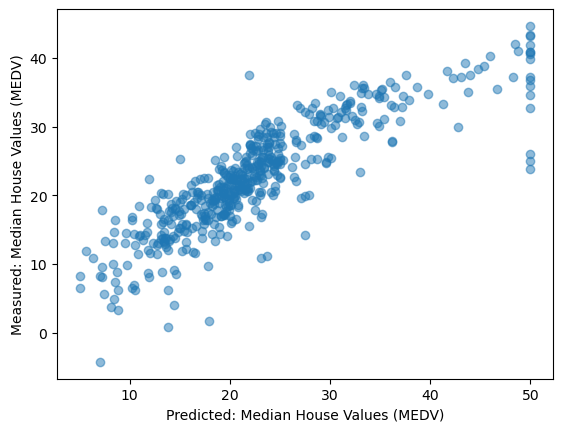

In [62]:
x = y_data_array
y = y_pred_array
plt.scatter(x, y, marker='o', alpha = 0.5)
plt.xlabel('Predicted: Median House Values (MEDV)')
plt.ylabel('Measured: Median House Values (MEDV)')

---

### <span style="color:blue">Exercise</span> 

- Explain in your own words what you see in the previous Figure.
- Describe what the above experiment did
- How many features where in our model?
- How good was the quality of the fit (what was the R2 and MSE)?

In [65]:
mse_ = mean_squared_error(y_true = y_data_array, y_pred = y_pred_array)
r2 = r2_score(y_true = y_data_array, y_pred = y_pred_array)

print("Mean Squared Error (MSE):",mse)
print("Coefficient of Determination (R²):",r2)

Mean Squared Error (MSE): 0.3071274913011361
Coefficient of Determination (R²): 0.7406426641094094


There is a positive relationship between predicted median house values (MEDV) and measured median house values (MEDV). As predicted MEDV increases, the measured MEDV increases. The above experiment shows that the predicted relationship between MEDV and all the variables matches the actual relationship between all the variables and the MEDV. There were 13 features (variables) in our model. The mean squared error (MSE) is around 0.31, which shows a good fit as it is a relatively small variation, and R squared is around 0.74, which means that around 74% of the variations in the measured MEDV can be accounted for by the predicted MEDV.